In [22]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from textblob import TextBlob

from wordcloud import WordCloud 
from itertools import chain

In [23]:
plt.style.use('ggplot')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lohwa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lohwa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Exploratory Data Analysis

In [24]:
df = pd.read_csv('Amazon Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


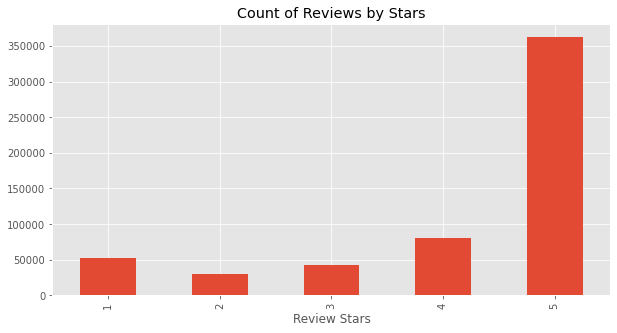

In [25]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', 
                                            title = 'Count of Reviews by Stars', 
                                            figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

# Textblob approach

In [26]:
# use textblob to calculate sentiment analysis 
df['Text'] = df['Text'].astype(str)
pol = lambda x: TextBlob(x).sentiment.polarity
df['Polarity'] = df['Text'].apply(pol)

Polarity lies within -1 and 1, where 1 represents the positive statement and -1 represents the negative statement.

In [27]:
df['Sentiment_Type']=''
df.loc[df.Polarity>0,'Sentiment_Type']='POSITIVE'
df.loc[df.Polarity==0,'Sentiment_Type']='NEUTRAL'
df.loc[df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [28]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity,Sentiment_Type
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000,POSITIVE
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333,NEGATIVE
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571,POSITIVE
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667,POSITIVE
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333,POSITIVE


<AxesSubplot:xlabel='Polarity', ylabel='Count'>

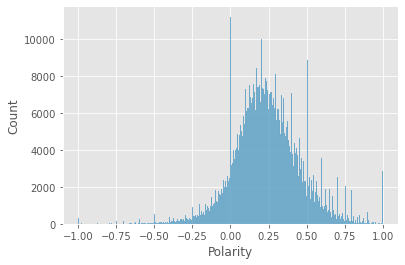

In [29]:
# plot histogram on polarity scores
sns.histplot(data = df['Polarity'])

Subjectivity is used to determine whether a sentence expresses an opinion or not. 

In [30]:
sub = lambda x: TextBlob(x).sentiment.subjectivity
df['Subjectivity'] = df['Text'].apply(sub)

<AxesSubplot:xlabel='Subjectivity', ylabel='Count'>

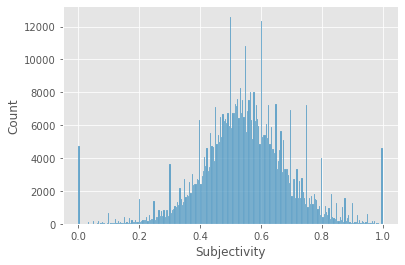

In [31]:
sns.histplot(data = df['Subjectivity'])

# Word Cloud

We shall create a wordcloud using the TF-IDF (Term Frequency Inverse Document Frequency) matrix instead of using the text directly. Two ways of converting words to meaningful numbers are the 'bag of words' count vectorizer approach, and the TF-IDF vectorizer.

Count vectorizer ranks words based on the frequency each word appears in a document, whereas TF-IDF indicates the relative importance of each word in a corpus (i.e., group of documents).

A TF-IDF value close to 0 indicates that the term is not important in either the corpus or the document or both. Whereas a larger value indicates that the term is unique for the document or the corpus or both.

Corpus TF-IDF values allows us to compare terms to each other across documents. Terms that are in fewer documents have higher scores, whereas terms in all documents have a score of 0. 

In [32]:
stopwords = set(stopwords.words('english'))
stopwords.update('br')
list_of_text = " ".join(review for review in df.Text)
word_cloud = WordCloud(stopwords = stopwords).generate(list_of_text)

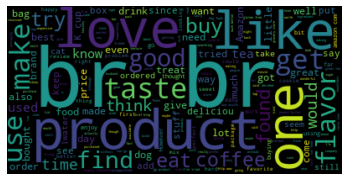

In [33]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
# word cloud using TF-IDF Document Term Matrix
# first import tfidfVectorizer from scikit-learn library to process text
from sklearn.feature_extraction.text import TfidfVectorizer

vecs = vectorizer.fit_transform(df['Text'])
# extract names from features
feature_names = vectorizer.get_feature_names()
dense = vecs.todense()
lst = dense.tolist()
df = pd.DataFrame(lst, columns = feature_names)
# get frequencies per term 
df.T.sum(axis=1)

NameError: name 'vectorizer' is not defined

In [ ]:
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(df.T.sum(axis=1))
plt.imshow(Cloud)

# LDA Topic Modelling using Gensim

In [ ]:
!pip install gensim

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en

In [ ]:
!pip install pyLDAvis

In [ ]:
#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#vis
import pyLDAvis
import pyLDAvis.gensim_models

#regex
import regex as re


In [ ]:
import spacy
spacy.load('en_core_web_sm')

# Tokenize sentences and clean

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub(r'[^\w\s]', '', sent) # remove punctuations
        CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        sent = re.sub(CLEANR, '', sent) # remove html tags
        
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) # deacc=True removes punctuations
        yield(sent)  

# Convert to list
data = df.Text.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

# Build bigram and trigram models and lemmatize

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

We can use Pointwise Mutual Information (PMI) Score to detect n-grams and measure how much more likely the words co-occur than if they were independent. The metric is sensitive to rare combination of words, so it is used with an occurrence frequency filter to ensure phrase relevance.

In [ ]:
# Example for detecting bigrams 
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder =nltk.collocations.BigramCollocationFinder.from_documents(data_words)

In [ ]:
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)
bigram_scores

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = nltk.collocations.TrigramCollocationFinder.from_documents(data_words)
# Filter only those that occur at least 50 times
finder.apply_freq_filter(50)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

In [ ]:
trigram_scores

In [ ]:
bigram_pmi = pd.DataFrame(bigram_scores)
bigram_pmi.columns = ['bigram', 'pmi']
bigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)
bigram_pmi

In [ ]:
trigram_pmi = pd.DataFrame(trigram_scores)
trigram_pmi.columns = ['trigram', 'pmi']
trigram_pmi.sort_values(by='pmi', axis = 0, ascending = False, inplace = True)

Additionally, we filter bigrams or trigrams with noun structures. This helps the LDA model better cluster topics, as nouns are better indicators of a topic being talked about. We use NLTK package to tag part of speech and filter these structures.

In [ ]:
# Filter for bigrams with only noun-type structures
def bigram_filter(bigram):
    tag = nltk.pos_tag(bigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['NN']:
        return False
    if bigram[0] in stop_words or bigram[1] in stop_words:
        return False
    if 'n' in bigram or 't' in bigram:
        return False
    if 'PRON' in bigram:
        return False
    return True

In [ ]:
filtered_bigram = bigram_pmi[bigram_pmi.apply(lambda bigram: bigram_filter(bigram['bigram']) and bigram.pmi > 5, axis = 1)][:500]

In [ ]:
bigrams = [' '.join(x) for x in filtered_bigram.bigram.values if len(x[0]) > 2 or len(x[1]) > 2]

In [ ]:
# Filter for trigrams with only noun-type structures
def trigram_filter(trigram):
    tag = nltk.pos_tag(trigram)
    if tag[0][1] not in ['JJ', 'NN'] and tag[1][1] not in ['JJ','NN']:
        return False
    if trigram[0] in stop_words or trigram[-1] in stop_words or trigram[1] in stop_words:
        return False
    if 'n' in trigram or 't' in trigram:
         return False
    if 'PRON' in trigram:
        return False
    return True 

In [ ]:
filtered_trigram = trigram_pmi[trigram_pmi.apply(lambda trigram: trigram_filter(trigram['trigram']) and trigram.pmi > 5, axis = 1)][:500]

In [ ]:
trigrams = [' '.join(x) for x in filtered_trigram.trigram.values if len(x[0]) > 2 or len(x[1]) > 2 and len(x[2]) > 2]

In [ ]:
trigrams

In [ ]:
# Concatenate n-grams
def replace_ngram(x):
    for gram in trigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    for gram in bigrams:
        x = x.replace(gram, '_'.join(gram.split()))
    return x

In [ ]:
df1 = df.copy()

In [ ]:
df1.Text = df.Text.map(lambda x: replace_ngram(x))

In [ ]:
df1.Text

References:
https://towardsdatascience.com/6-tips-to-optimize-an-nlp-topic-model-for-interpretability-20742f3047e2

# Remove stopwords

In [ ]:
texts = [[word for word in document.lower().split() if word not in stop_words] for document in df1.Text]

In [ ]:
texts

# Remove words that only appear once

In [ ]:
all_tokens = sum(texts, [])
tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
texts = [[word for word in text if word not in tokens_once] for text in texts]

# Lemmatization

In [ ]:
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
"""Lemmatization"""
texts_out = []
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
for sent in texts:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
# remove stopwords once more after lemmatization
texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    

In [ ]:
"""To conduct topic modelling for each doc"""
id2word = corpora.Dictionary(texts) # convert tokenized lists into dictionary
corpus = []
for text in texts:
    #create document term matrix
    new = id2word.doc2bow(text) # start with Bag of Words representation of the docs
    # document term matrix tracks the frequency of each term for each doc
    corpus.append(new)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10, 
                                           minimum_probability=0,
                                           alpha="auto") # update the model every 1 iteration and pass over the data 10 times

# Print the topics

In [ ]:
for top in lda_model.print_topics():
    print(top)

# Find threshold

# Aim: to see which document belongs to which topic

In [ ]:
# assign topics to the documents in corpus
lda_corpus = lda_model[corpus]
# lda_corpus is a list of lists where number of rows = number of docs and number of cols = number of topics
# elements of lda_corpus are of the form [(0,p0), (1,p1), (2,p2)...] where the 1st number is the topic index and the 2nd number is the 
# corresponding prob of the document belonging to that topic

In [ ]:
# find threshold by setting threshold to be 1/(number of clusters)
# to prove threshold is sane, we average the sum of all probabilities
scores = list(chain(*[[score for topic_id, score in topic]
                     for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

In [ ]:
# take a look at the clusters
cluster1 = [j for i,j in zip(lda_corpus, documents) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus, documents) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus, documents) if i[2][1] > threshold]
cluster1

# Find top words per topic

In [ ]:
# to harmonize the data better and make it less computationally intensive
def lemmatization(texts, allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en_core_web_sm')
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

lemmatized_texts = lemmatization(df1['Text'])

In [ ]:
lemmatization(df1['Text'].tolist())

In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text) # convert a document into a list of tokens
        final.append(new)
    return (final)
data_words = gen_words(lemmatized_texts)
data_words

In [ ]:
top_words_per_topic = []
for t in range(lda_model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda_model.show_topic(t, topn=20)])
top_words_per_topic

# Visualizing the data

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30) #top 30 words 
#metric multidimensional scaling
vis #each circle represents a different topic/cluster 

# Remove words that do not add value

In [ ]:
# create bigrams (2 words freq occurring together) and trigrams (3 words) and remove frequent words 

bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=50) # min number of times for a word to occur in order to be considered a bigram
# min number of phrases that are found; higher number means fewer number of phrases
trigram_phrases= gensim.models.Phrases(bigram_phrases[data_words], threshold=50)

bigram= gensim.models.phrases.Phraser(bigram_phrases)
trigram= gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return(bigram[doc] for doc in texts)

def make_trigrams(texts):
    return(trigram[bigram[doc]] for doc in texts)

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print(data_bigrams_trigrams)

In [ ]:
# TF-IDF removal
from gensim.models import TfidfModel
id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts] # contain numerical bags of words that contain frequency

tfidf = TfidfModel(corpus, id2word=id2word) # aim: if a word occurs so frequently it does not lend much value to the clustering algo

low_value=0.03
words=[]
words_missing_in_tfidf=[]

for i in range(len(corpus)):
    bow=corpus[i]
    low_value_words=[]
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] #words with tfidf score 0 will be missing
    
    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [ ]:
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10, 
                                           alpha="auto") # update the model every 1 iteration and pass over the data 10 times

In [ ]:
# coherence number
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model1, text=datawords)

In [ ]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model1, corpus, id2word, mds="mmds", R=30) #top 30 words 
#metric multidimensional scaling
vis #each circle represents a different topic/cluster 

References:
https://stackoverflow.com/questions/20984841/topic-distribution-how-do-we-see-which-document-belong-to-which-topic-after-doi